In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from joypy import joyplot
# from sklearn.model_selection import train_test_split 
# import warnings
# warnings.filterwarnings("ignore")

# Exploratory Data Analysis

In [2]:
index = pd.read_csv('data/index.csv')
subregion_codes = index[(index['country_code'] == 'US') & (index['aggregation_level']==1)]['subregion1_code'].unique()
state_indexes = list(map(lambda x: f'US_{x}', list(subregion_codes)))

In [3]:
epidemiology = pd.read_csv('data/epidemiology.csv')

In [51]:
demographics = pd.read_csv('data/demographics.csv')
state_demographics = demographics[demographics['location_key'].isin(state_indexes)]

## New Confirmed Cases

In [6]:
new_confirmed = epidemiology[['date', 'location_key', 'new_confirmed']]
new_confirmed = new_confirmed[new_confirmed['location_key'].isin(state_indexes)]
new_confirmed.rename({'new_confirmed':'New Confirmed Cases'},axis=1, inplace=True)
new_confirmed['date'] = pd.to_datetime(new_confirmed['date']).dt.date.astype(str)
new_confirmed['location_key'] = new_confirmed['location_key'].apply(lambda x: x[3:]) 
new_confirmed = new_confirmed.sort_values('date')
max_value = new_confirmed['New Confirmed Cases'].max()
new_confirmed = new_confirmed.drop(index=10148155)
new_confirmed

date location_key  New Confirmed Cases
12295734  2020-01-13           WA                  0.0
12295735  2020-01-14           WA                  0.0
12295736  2020-01-15           WA                  0.0
12295737  2020-01-16           WA                  0.0
12295738  2020-01-17           WA                  0.0
...              ...          ...                  ...
11293528  2022-09-15           ND                  0.0
11412827  2022-09-15           NJ               2767.0
11470386  2022-09-15           NY               2300.0
9916605   2022-09-15           AL               1042.0
12428419  2022-09-15           WY                  0.0

[54217 rows x 3 columns]

In [7]:
fig = px.choropleth(new_confirmed,
                    locations='location_key',
                    locationmode='USA-states',
                    color='New Confirmed Cases',
                    color_continuous_scale='Viridis_r',
                    scope='usa',
                    animation_frame='date')
fig.show()

In [55]:
sd = state_demographics.loc[:]
sd['location_key'] = sd['location_key'].apply(lambda x: x[3:])
sd = sd[['location_key', 'population']]

merged_cases = new_confirmed.merge(sd, on='location_key')

merged_cases['New Percentage Infected'] = merged_cases['New Confirmed Cases'] * 100 / merged_cases['population']
merged_cases = merged_cases[['New Percentage Infected', 'location_key', 'date']]

In [ ]:

fig = px.choropleth(merged_cases,
                    locations='location_key',
                    locationmode='USA-states',
                    color='New Confirmed Cases',
                    color_continuous_scale='Viridis_r',
                    scope='usa',
                    animation_frame='date')
fig.show()

### New Confirmed Cases for the United States

<AxesSubplot:>

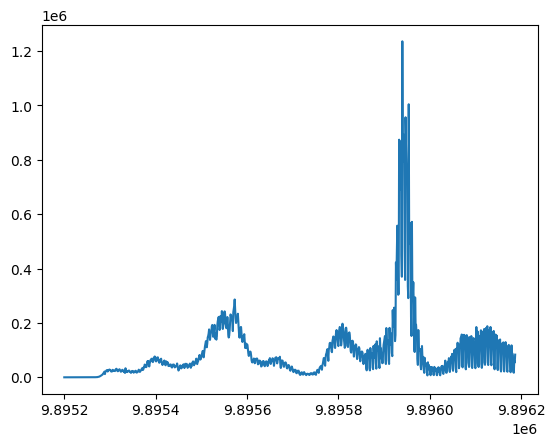

In [8]:
epidemiology[epidemiology['location_key'] == 'US']['new_confirmed'].plot()

## Cumulative Confirmed Cases

In [41]:
cumulative_confirmed = epidemiology[['date', 'location_key', 'cumulative_confirmed']]
cumulative_confirmed = cumulative_confirmed[cumulative_confirmed['location_key'].isin(state_indexes)]
cumulative_confirmed.rename({'cumulative_confirmed':'Cumulative Confirmed Cases'},axis=1, inplace=True)
cumulative_confirmed['date'] = pd.to_datetime(cumulative_confirmed['date']).dt.date.astype(str)
cumulative_confirmed['location_key'] = cumulative_confirmed['location_key'].apply(lambda x: x[3:]) 
cumulative_confirmed = cumulative_confirmed.sort_values('date')
max_value = cumulative_confirmed['Cumulative Confirmed Cases'].max()
cumulative_confirmed = cumulative_confirmed.drop(index=10148155)
cumulative_confirmed

date location_key  Cumulative Confirmed Cases
12295734  2020-01-13           WA                         NaN
12295735  2020-01-14           WA                         0.0
12295736  2020-01-15           WA                         0.0
12295737  2020-01-16           WA                         0.0
12295738  2020-01-17           WA                         0.0
...              ...          ...                         ...
11293528  2022-09-15           ND                    266273.0
11412827  2022-09-15           NJ                   2706107.0
11470386  2022-09-15           NY                   6033898.0
9916605   2022-09-15           AL                   1512134.0
12428419  2022-09-15           WY                    175746.0

[54217 rows x 3 columns]

In [34]:
fig = px.choropleth(cumulative_confirmed,
                    locations='location_key',
                    locationmode='USA-states',
                    color='Cumulative Confirmed Cases',
                    color_continuous_scale='Viridis_r',
                    scope='usa',
                    animation_frame='date')
fig.show()

In [52]:
sd = state_demographics.loc[:]
sd['location_key'] = sd['location_key'].apply(lambda x: x[3:])
sd = sd[['location_key', 'population']]

merged_cases = cumulative_confirmed.merge(sd, on='location_key')

merged_cases['Cumulative Percentage Infected'] = merged_cases['Cumulative Confirmed Cases'] * 100 / merged_cases['population']
merged_cases = merged_cases[['Cumulative Percentage Infected', 'location_key', 'date']]

In [53]:

fig = px.choropleth(merged_cases,
                    locations='location_key',
                    locationmode='USA-states',
                    color='Cumulative Percentage Infected',
                    color_continuous_scale='Viridis_r',
                    scope='usa',
                    animation_frame='date')
fig.show()

### New Confirmed Cases for the United States

<AxesSubplot:>

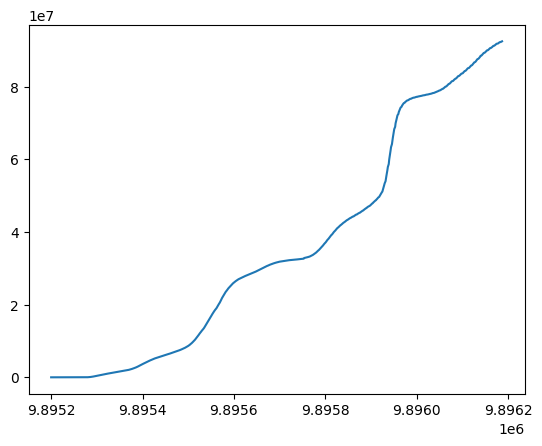

In [61]:
epidemiology[epidemiology['location_key'] == 'US']['cumulative_confirmed'].plot()

## Statewise Comparisons

### Hospitalizations per state

In [39]:
hospitalizations = pd.read_csv('data/hospitalizations.csv')

In [40]:
hospitalizations.columns

Index(['date', 'location_key', 'new_hospitalized_patients',
       'cumulative_hospitalized_patients', 'current_hospitalized_patients',
       'new_intensive_care_patients', 'cumulative_intensive_care_patients',
       'current_intensive_care_patients', 'new_ventilator_patients',
       'cumulative_ventilator_patients', 'current_ventilator_patients'],
      dtype='object')

In [41]:
# Categories to consider: cumulative_hospitalized_patients, cumulative_intensive_care_patients, cumulative_ventilator_patients at the end of the date range
# Normalize these based on the total population for that state
state_hospitalizations = hospitalizations[hospitalizations['location_key'].isin(state_indexes)]
cumulative_state_hospitalizations = state_hospitalizations[['date', 'location_key', 'cumulative_hospitalized_patients']]
final_cumulative_state_hospitalizations = cumulative_state_hospitalizations[cumulative_state_hospitalizations['date'] == '2022-09-15']
final_cumulative_state_hospitalizations = final_cumulative_state_hospitalizations.drop('date', axis=1) 

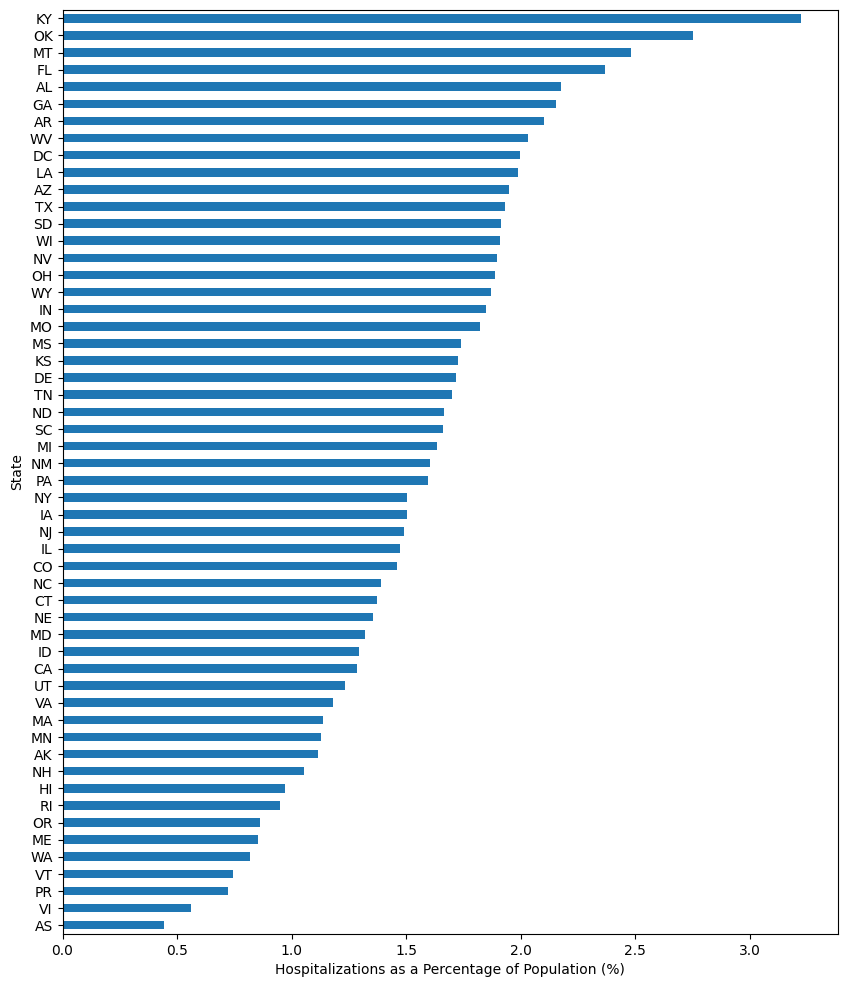

In [42]:
indexed_final_cumulative_state_hospitalizations = final_cumulative_state_hospitalizations.set_index('location_key')
indexed_state_demographics = state_demographics[['location_key', 'population']].set_index('location_key')
joined_df = indexed_final_cumulative_state_hospitalizations.join(indexed_state_demographics)
joined_df['percentage'] = joined_df['cumulative_hospitalized_patients']/joined_df['population']*100
joined_df = joined_df.sort_values('percentage')
joined_df.index = map(lambda x: x[3:], joined_df.index)

plt.figure(figsize=(10,12))
joined_df['percentage'].plot(kind='barh')
plt.xlabel('Hospitalizations as a Percentage of Population (%)')
plt.ylabel('State')
plt.show()

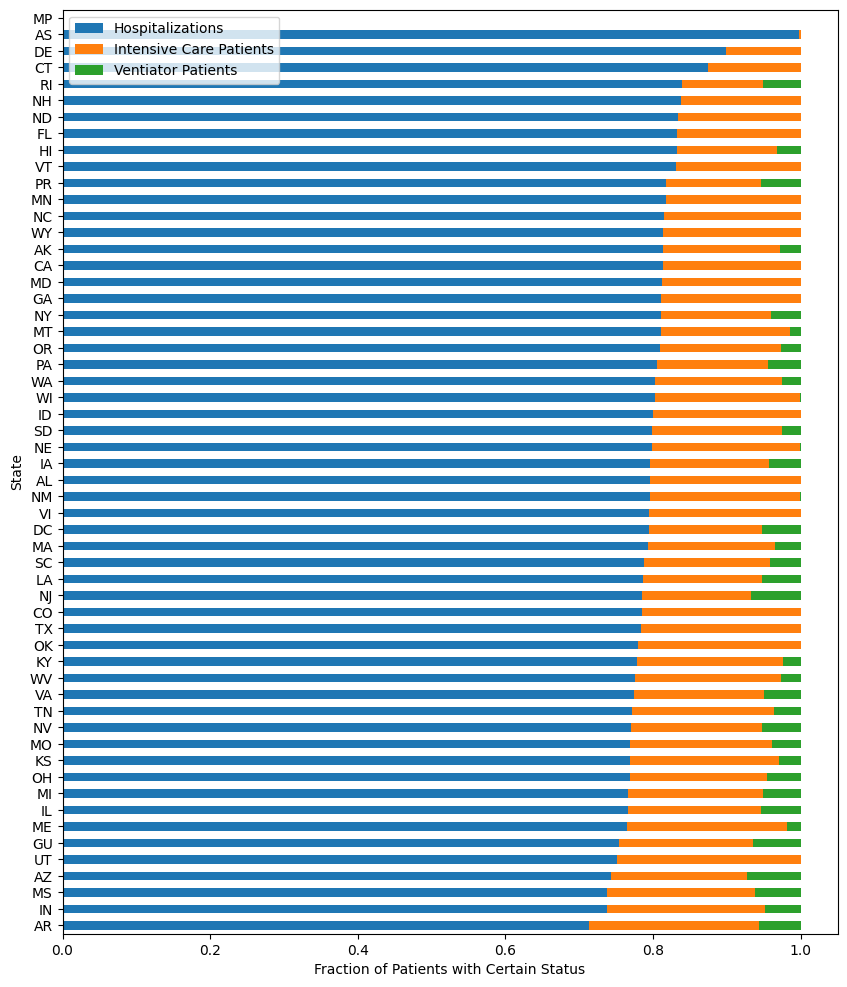

In [43]:
current_hospital_stats = state_hospitalizations[['date', 'location_key', 'current_hospitalized_patients', 'current_intensive_care_patients', 'current_ventilator_patients']]
current_hospital_stats = current_hospital_stats.drop('date', axis=1)
sum_of_current_hospital_stats = current_hospital_stats.groupby(['location_key']).sum()
sum_of_current_hospital_stats = pd.DataFrame(sum_of_current_hospital_stats)
indexed_state_demographics = state_demographics[['location_key', 'population']].set_index('location_key')
joined_sum_df = sum_of_current_hospital_stats.join(indexed_state_demographics)
joined_sum_df['current_hospitalized_patients'] = joined_sum_df['current_hospitalized_patients']/joined_sum_df['population']
joined_sum_df['current_intensive_care_patients'] = joined_sum_df['current_intensive_care_patients']/joined_sum_df['population']
joined_sum_df['current_ventilator_patients'] = joined_sum_df['current_ventilator_patients']/joined_sum_df['population']
joined_sum_df = joined_sum_df.drop('population', axis=1)
joined_sum_df = joined_sum_df.div(joined_sum_df.sum(axis=1),axis=0)
joined_sum_df = joined_sum_df.sort_values('current_hospitalized_patients')
joined_sum_df.index = map(lambda x: x[3:], joined_sum_df.index)

plt.figure(figsize=(10,12))
ax = plt.axes()
joined_sum_df.plot(kind='barh', stacked=True, ax=ax)
plt.xlabel('Fraction of Patients with Certain Status')
plt.ylabel('State')
plt.legend(['Hospitalizations', 'Intensive Care Patients', 'Ventiator Patients'])
plt.show()

### Age demographics

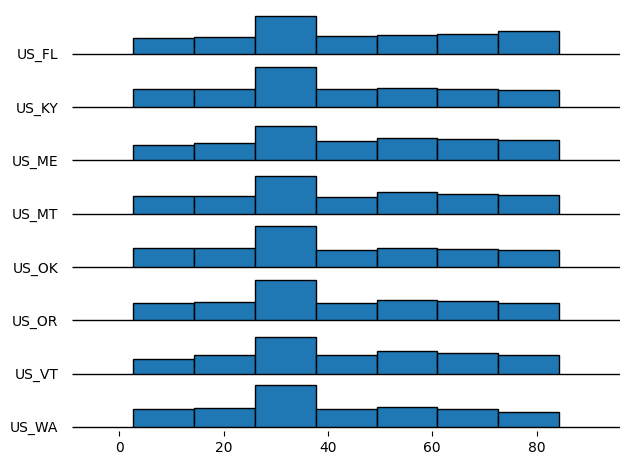

In [44]:
import re
import math
from statistics import mean
from collections import defaultdict
from matplotlib import cm

age_columns = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29',
               'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
               'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']

state_ages = demographics[demographics['location_key'].isin(['US_VT', 'US_WA', 'US_ME', 'US_OR', 'US_KY', 'US_OK', 'US_MT', 'US_FL'])]
state_ages = state_ages[['location_key', 'population'] + age_columns]
state_ages = state_ages.dropna()
state_ages[state_ages.columns.difference(['location_key', 'population'])] = state_ages[state_ages.columns.difference(['location_key', 'population'])].div(state_ages[state_ages.columns.difference(['location_key', 'population'])].sum(axis=1), axis=0)

data = defaultdict(list)
for index in state_ages.index:
    row = state_ages.loc[index].copy()
    
    counts = defaultdict(int)
    total_num = 1000
    for _ in range(total_num):
        col = row[age_columns].astype(float).idxmax()
        row[col] = row[col] - 1/total_num
        counts[col] += 1
    for column in age_columns:
        pattern = r'\d+'
        numbers = [int(match) for match in re.findall(pattern, column)]
        avg = math.ceil(mean(numbers)) + 1
        data[row['location_key']] += [avg for _ in range(counts[column])] 

hist_df = pd.DataFrame.from_dict(data)

joyplot(hist_df, hist = True, bins = len(age_columns), overlap=0)
plt.show()

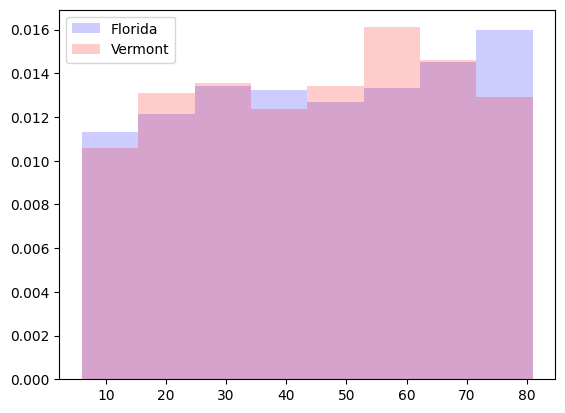

In [45]:
plt.hist(hist_df['US_FL'],alpha=0.2,label="Florida",bins=len(age_columns)-1,density=True, color="blue")
plt.hist(hist_df['US_VT'],alpha=0.2,label="Vermont",bins=len(age_columns)-1,density=True, color="red")
plt.legend()
plt.show()

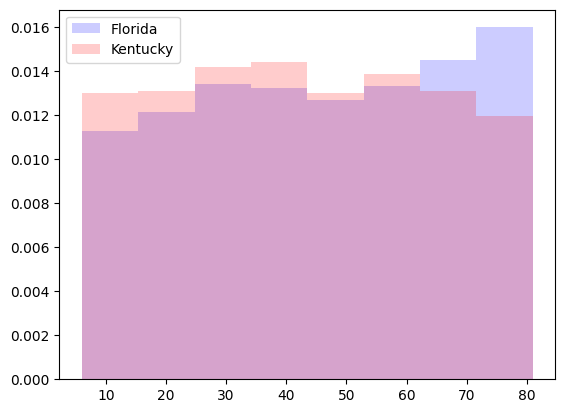

In [46]:
plt.hist(hist_df['US_FL'],alpha=0.2,label="Florida",bins=len(age_columns)-1,density=True, color="blue")
plt.hist(hist_df['US_KY'],alpha=0.2,label="Kentucky",bins=len(age_columns)-1,density=True, color="red")
plt.legend()
plt.show()

## Gender

## Vaccine Access

## Prepare Data

# Training

In [49]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import ParameterGrid
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import accuracy_score

def ML_pipeline(X, y, param_grid, fit_function, random_state, manageable_fraction_of_data=0.1):
    # first split to separate out the training set
    X_managable, _, y_managable, _ = train_test_split(X, y, train_size = manageable_fraction_of_data, random_state=random_state)
    X_train, X_other, y_train, y_other = train_test_split(X_managable, y_managable, train_size = 0.95, random_state=random_state)

    # second split to separate out the validation and test sets
    X_val, X_test, y_val, y_test = train_test_split(X_other, y_other, train_size=0.5, random_state=random_state)

    # Preprocess features
    onehot_ftrs = [] # TODO
    std_ftrs = [] # TODO

    preprocessor = ColumnTransformer(
        transformers=[
            ('onehot', OneHotEncoder(sparse=False, handle_unknown='ignore'), onehot_ftrs),
            ('std', StandardScaler(), std_ftrs)])

    pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

    X_train_prep = pipeline.fit_transform(X_train)
    X_val_prep = pipeline.transform(X_val)
    X_test_prep = pipeline.transform(X_test)

    feature_names = np.array(preprocessor.get_feature_names_out())

    # we save the train and validation scores
    # the validation scores are necessary to select the best model
    train_score = np.zeros(len(ParameterGrid(param_grid)))
    val_score = np.zeros(len(ParameterGrid(param_grid)))
    models = []

    # loop through all combinations of hyperparameter combos
    for p in range(len(ParameterGrid(param_grid))):
        params = ParameterGrid(param_grid)[p]
        print(f"\tCurrent parameters: {params}")
        eval_set = [(X_val_prep, y_val)]
        
        fit_model = fit_function(X_train_prep, y_train, eval_set, params)
        models.append(fit_model) # save it
        
        # calculate train and validation accuracy scores
        y_train_pred = fit_model.predict(X_train_prep)
        train_score[p] = accuracy_score(y_train, y_train_pred)
        y_val_pred = fit_model.predict(X_val_prep)
        val_score[p] = accuracy_score(y_val, y_val_pred)
        print('   ',train_score[p], val_score[p])

    print('best model parameters:',ParameterGrid(param_grid)[np.argmax(val_score)])
    print('corresponding validation score:',np.max(val_score))
    # collect and save the best model
    final_model = models[np.argmax(val_score)]
    # calculate and save the test score
    y_test_pred = final_model.predict(X_test_prep)
    test_score = accuracy_score(y_test,y_test_pred)
    print('test score:',test_score)
    return final_model, test_score, X_test_prep, y_test, feature_names

In [ ]:
import sklearn 

X = None
y = None
param_grid = None
sklearn.RandomForestClassifier()
fit_function = None
random_state = None
pipeline = ML_pipeline(X, y, param_grid, fit_function, random_state)

In [50]:
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import shap

def understand_results(tag, model, test_score, X_test_prep, y_test, feature_names, 
                       confusion_matrix=True, 
                       roc_curve=False,
                       permutation_feature_importance=False,
                       xgboost_importances=False,
                       shap_importance=False,
                       shap_tree_importance=False):
    if confusion_matrix:
        disp = ConfusionMatrixDisplay.from_estimator(model, X_test_prep, y_test, display_labels=['Cancelled','LargeDelay','MediumDelay','OnTime','SlightDelay'], xticks_rotation='vertical')
        disp.plot()
        plt.title(f"{tag} Overall Confusion Matrix")
        plt.tight_layout()
        plt.xticks(rotation='vertical')
        plt.savefig(f'../figures/{tag}_confusion_matrix.png', dpi=300, bbox_inches='tight')
        plt.show()
        
    if roc_curve:
        fpr, tpr, p_crits = roc_curve(y_test, model.predict_proba(X_test_prep))
        plt.plot(fpr,tpr)
        plt.xlabel('fpr')
        plt.ylabel('tpr')
        plt.title(f'{tag} ROC curve')
        plt.show()

    if permutation_feature_importance:
        y_pred = model.predict(X_test_prep)
        result = permutation_importance(model, X_test_prep, y_test, n_repeats=10, random_state=0)
        sorted_indcs = np.argsort(result.importances_mean)[::-1][:10][::-1]
        plt.rcParams.update({'font.size': 13})
        plt.boxplot(test_score-result.importances[sorted_indcs].T, labels=feature_names[sorted_indcs], vert=False)
        plt.axvline(test_score, label='test score')
        plt.title(f"{tag} Permutation Importances (test set)")
        plt.xlabel('Score with perturbed feature')
        plt.ylabel("Features")
        plt.legend()
        plt.tight_layout()
        plt.savefig(f'../figures/{tag}_permutation_feature_importance.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    if xgboost_importances:
        for type in ["weight", "gain", "cover", "total_cover", "total_gain"]:
            importances = model.get_booster().get_score(importance_type=type)
            importances_keys = np.array(list(importances.keys()))
            importances_values = np.array(list(importances.values()))
            sorted_indcs = np.argsort(importances_values)[::-1][:10][::-1]

            plt.barh(list(range(10)), importances_values[sorted_indcs], align='center')
            plt.yticks(list(range(10)), feature_names[sorted_indcs])
            plt.ylabel("Features")
            plt.xlabel("Feature importance")
            plt.title(f"XGBoost Feature Importance: {type}")
            plt.savefig(f'../figures/{tag}_xgboost_feature_importance_{type}.png', dpi=300, bbox_inches='tight')
            plt.show()
            
    if shap_importance:
        shap.initjs()
        explainer = shap.KernelExplainer(model.predict_proba, X_test_prep)
        shap_values = explainer.shap_values(X_test_prep)
        shap.bar_plot(np.mean(np.abs(shap_values[0]), axis=0), feature_names=feature_names, max_display=10, show=False)
        plt.title(f'{tag} SHAP Global Feature Importance')
        plt.savefig(f'../figures/{tag}_shap_global.png', dpi=300, bbox_inches='tight')
        plt.show()

        index = 0
        shap.force_plot(explainer.expected_value[0], shap_values[0][index,:], features = X_test_prep[index, :], feature_names = feature_names, show=False, matplotlib=True)
        plt.title(f'{tag} SHAP Local Feature Importance')
        plt.savefig(f'../figures/{tag}_shap_local.png', dpi=300, bbox_inches='tight')
        plt.show()

    if shap_tree_importance:
        shap.initjs()
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_test_prep)
        shap.bar_plot(np.mean(np.abs(shap_values[0]), axis=0), feature_names=feature_names, max_display=10, show=False)
        plt.title(f'{tag} SHAP Global Feature Importance')
        plt.savefig(f'../figures/{tag}_shap_global.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        index = 0
        shap.force_plot(explainer.expected_value[0], shap_values[0][index,:], features = X_test_prep[index, :], feature_names = feature_names, show=False, matplotlib=True)
        plt.title(f'{tag} SHAP Local Feature Importance')
        plt.savefig(f'../figures/{tag}_shap_local.png', dpi=300, bbox_inches='tight')
        plt.show()
        